In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm



# Problem: Stayzilla Listing Room Price Prediction

In [354]:
# load the data 
data = pd.read_csv('stayzilla_com-travel_sample.csv') # original sample data with more columns

data1 = pd.read_csv('stayzilla_rough_cleaned.csv') # rough cleaned data 

# Data Processing 

In [305]:
# inspect the data
data.shape
data.head()

,additional_info,amenities,check_in_date,check_out_date,city,country,crawl_date,description,highlight_value,hotel_star_rating,...,query_time_stamp,room_price,room_types,search_term,service_value,similar_hotel,sitename,things_to_do,things_to_note,uniq_id
0,Acceptance Rate:100 percent|Response Time:< 6 hours,Newspaper,04-08-2016,05-08-2016,Kalimpong,India,2016-07-20,Sangsey Valley Resort is Located at the wonderful location of upper delo icchey dara gaon .Delo Hill is an extended nature park with very well mai...,NaN,NaN,...,2016-07-20 10:59:55 +0000,3167per night incl. tax,3 Bedded Room,NaN,Not Verified,NaN,www.stayzilla.com,NaN,"All taxes.|Complimentary Breakfast, Lunch and Dinner.",52a63c632d90923f7f0c394a79dce191
1,Acceptance Rate:100 percent|Response Time:< 6 hours,Parking|AC,04-08-2016,05-08-2016,Kanpur,India,2016-07-20,"What should you know? Enjoy unmatched service at affordable prices at Amantran Hotel. Laundry, doctor-on-call, car parking, and a travel desk for ...",NaN,NaN,...,2016-07-20 10:59:55 +0000,815per night incl. tax,Double Non-A/C Rooms,NaN,Not Verified,Hotel Mangalam|Hotel Maha Roopa Palace,www.stayzilla.com,NaN,"Kindly Note:|This Tariff is not applicable for long weekends, Government Holidays and festival period.",49ad3256fc231a4c9fdb6f6f2cc00d16
2,Acceptance Rate:100 percent|Response Time:< 6 hours,Pickup & Drop|Parking|AC,04-08-2016,05-08-2016,Jodhpur,India,2016-07-20,"What should you know? A budget hotel, this accommodation facility is located in the heart of Jodhpur City and is easily accessible from all major ...",NaN,NaN,...,2016-07-20 10:59:55 +0000,1624per night incl. tax,Deluxe AC Double,NaN,Not Verified,Gouri Heritage Haveli|The Regent Hotel|Vista Rooms at Khaas Bagh|Hotel Guru International,www.stayzilla.com,NaN,All taxes.|Complimentary Tea.,8b5952e578717e20b311846f7aab031f
3,Acceptance Rate:100 percent|Response Time:< 6 hours,WiFi|Newspaper|Pickup & Drop|Gym|Parking|AC,04-08-2016,05-08-2016,Jalpaiguri,India,2016-07-20,What should you know? The Riverwood Forest Retreats is part of the Dooars in North Bengal and set amidst the mountains of the foothills of the Him...,NaN,NaN,...,2016-07-20 10:59:55 +0000,3509per night incl. tax,Premium Single A/c,NaN,Not Verified,NaN,www.stayzilla.com,NaN,All taxes|Complimentary Breakfast|Kindly Note:|Extra Bed will be provided at additional charges that has to be paid to the hotel management at the...,032d715cabef6d4633e753de416929a8
4,Acceptance Rate:100 percent|Response Time:< 6 hours,Newspaper|AC,04-08-2016,05-08-2016,Kanpur,India,2016-07-20,"What should you know? Located at a walking distance from the South X Mall, Hotel Vijay Inter Continental provides a wide range of services to its ...",NaN,NaN,...,2016-07-20 10:59:55 +0000,5802per night incl. tax,Deluxe AC Double,NaN,Not Verified,Hotel Royal Cliff,www.stayzilla.com,NaN,Complimentary Breakfast.|Complimentary WiFi.|Complimentary Tea/Coffee maker in the room.|Service charge 10%|Kindly Note:|This Tariff is not applic...,ed546591dba770faae0ec3edadb0fcde


In [306]:
data.tail()

,additional_info,amenities,check_in_date,check_out_date,city,country,crawl_date,description,highlight_value,hotel_star_rating,...,query_time_stamp,room_price,room_types,search_term,service_value,similar_hotel,sitename,things_to_do,things_to_note,uniq_id
1202,~ All Taxes.~ Complimentary Bed Tea.~ Complimentary WiFi.,Restaurent | Business Center | Wifi | Swimming Pool | Credit Card | Laundry | Gym | Free Newspaper | Car Parking,06/01/2016,09/01/2016,Mandi,NaN,NaN,NaN,"What should you know?\n Midway resort, as the name suggests, is situated in Mandi Valley that falls between Chandigarh-Manali and Shimla-Manali Hi...",0.0,...,2015-12-30 15:21:16 +0000,NaN,Deluxe Room Non Ac | Deluxe Room Ac | Super Deluxe Room Ac | Family Suite Ac | Extra Bed,Mandi,Laundry | Free Newspaper | Parking,NaN,stayzilla,Restaurant | Swimming Pool | Health Club,NaN,8cdac0cb8c7c71a1731370750b5448f0
1203,~ All Taxes,Wifi | Laundry | Car Parking,06/01/2016,09/01/2016,Bhilwara,NaN,NaN,NaN,"What should you know?\n A budget hotel that offers two categories of rooms namely deluxe and luxury, Hotel City Plaza provides basic amenities to ...",0.0,...,2015-12-30 15:21:16 +0000,NaN,Deluxe Double | Luxury Double | Extra Bed,Bhilwara,Laundry | Parking | 24 hour check in | 24 hour check out,NaN,stayzilla,NaN,NaN,d091b4973071cbc2559c0db555db80f3
1204,Kindly Note ~ Hotel doesn't have Restaurants in the premises.,Laundry | Car Parking,06/01/2016,09/01/2016,Gandhinagar,NaN,NaN,NaN,What should you know?\n Hotel Shreeji boasts of 11 spacious and well-appointed rooms which are air-conditioned. The hotel provides Airport and Rai...,0.0,...,2015-12-30 15:21:16 +0000,NaN,Double Non A/c Room | Double A/c Room | Extra Bed,Gandhinagar,Laundry | Parking,NaN,stayzilla,NaN,NaN,9fb6e2266ea09509d668195b1250eed1
1205,~ All taxes.~ Complimentary WiFi. And Bed Tea; Coffee And News Paper.~ Complimentary Pickup And Drop From Bus Stand.,Wifi | Credit Card | Laundry | Free Newspaper | Car Parking,06/01/2016,09/01/2016,Uttarkashi,NaN,NaN,NaN,NaN,0.0,...,2015-12-30 15:21:16 +0000,NaN,Double Non A/c Room | Deluxe Non A/c Double | Deluxe A/c Double | Extra Bed,Uttarkashi,Laundry | Free Newspaper | Parking | 24 hour check in | 24 hour check out,NaN,stayzilla,NaN,NaN,6376a5202298fb78e0f9954a85b8a45c
1206,NaN,Bar/Pub | Wifi | Laundry | Free Newspaper,06/01/2016,09/01/2016,Goa,NaN,NaN,NaN,NaN,0.0,...,2015-12-30 15:21:16 +0000,NaN,Duplex Upstairs Hut Double | Duplex Downstairs Hut Double | Extra Bed,Goa Velha,Laundry | Free Newspaper,NaN,stayzilla,Bar,NaN,8d1913cb412923244fb6c5c333a3d8d1


In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   additional_info    1203 non-null   object 
 1   amenities          1154 non-null   object 
 2   check_in_date      1207 non-null   object 
 3   check_out_date     1207 non-null   object 
 4   city               1207 non-null   object 
 5   country            1139 non-null   object 
 6   crawl_date         1139 non-null   object 
 7   description        919 non-null    object 
 8   highlight_value    52 non-null     object 
 9   hotel_star_rating  68 non-null     float64
 10  image_count        985 non-null    float64
 11  image_urls         947 non-null    object 
 12  internet           68 non-null     object 
 13  landmark           68 non-null     object 
 14  latitude           1207 non-null   float64
 15  longitude          1207 non-null   float64
 16  occupancy          1139 

In [308]:
# check missing values
data.isnull().sum()

additional_info         4
amenities              53
check_in_date           0
check_out_date          0
city                    0
country                68
crawl_date             68
description           288
highlight_value      1155
hotel_star_rating    1139
image_count           222
image_urls            260
internet             1139
landmark             1139
latitude                0
longitude               0
occupancy              68
pageurl                 0
property_address        0
property_id             0
property_name           0
property_type           0
qts                    68
query_time_stamp        0
room_price             68
room_types              0
search_term          1139
service_value           1
similar_hotel         382
sitename                0
things_to_do         1167
things_to_note        230
uniq_id                 0
dtype: int64

For the purpose of modeling, we will use the features that could affect the property price to a certain degree and are not sustaintially missing. We will not use features that are not obviously relevant to price prediction such as  `property_name`, nor features that has many missing values. <br>

In [500]:
# extract possible features  
features = ['additional_info', 'city', 'amenities', 'description' , 'image_count', 'latitude', 'longitude', 'occupancy','property_id',
           'property_type','room_price',  'room_types', 'service_value', 'similar_hotel', 'things_to_do']
data0 = data[data.check_in_date == '04-08-2016'][['additional_info', 'city', 'amenities', 'description' , 'image_count', 'latitude', 'longitude', 'occupancy','property_id',
           'property_type','room_price',  'room_types', 'service_value', 'similar_hotel', 'things_to_do']]

# remove duplicated property id
data0.drop_duplicates(subset=['property_id'], inplace=True)
data1.drop_duplicates(subset=['property_id'], inplace=True)


The sample dataset has 36 columns in total. After inspecting each column, we found the data in some columns is not equally available between two different check-in dates. We will use the data with check-in data on 04-08-2016 because it has a larger portion in total rows than the other check-in date. <br>


In [501]:
data0.shape

(1139, 15)

# Feature engineering


### Extract numerical values from categorical variables

In [502]:
# three columns (i.e. amenities, room_type, things_to_note) may contain 'AC'/'WIFI' information
# to determine if a property has wifi or AC, we compare all three columns to extract such information. 
combo = data0[['amenities', 'room_types', 'things_to_do']].fillna('')
data0['combined'] = combo['amenities'] + ' ' + combo['room_types'] + ' ' + combo['things_to_do'] 

# add 'wifi' column if a property has wifi
data0['wifi'] = data0.combined.apply(lambda x: 1 if 'wifi' in x.lower() else 0)

# add 'ac' column if a property has ac
data0['ac'] = data0.combined.apply(lambda x: 1 if 'ac' in x.lower() else 0)

# add 'breakfast' column if a property has free breakfast
data0['breakfast'] = data0.combined.apply(lambda x: 1 if 'breakfast' in x.lower() else 0)

In [503]:
#  'num_amenities': transform 'amenities' into a numerical variable
import re
data0['num_amenities'] = data0['amenities'].apply(lambda x: [] if pd.isnull(x) else re.split(r'[/|&\s]\s*', x))
data0['num_amenities'] = data0['num_amenities'].apply(lambda x: list(filter(None, x)))
data0['num_amenities'] = data0['num_amenities'].apply(len)

In [504]:
# 'num_descrption': count the number of words in a description, 0 if NaN 
data0['descr_len']= data0.description.apply(lambda x: 0 if pd.isnull(x) else len(x.split()))

In [505]:
# convert 'room_type' to a binary variable 'deluxe': 1 if it contains the word 'deluxe' or ''Superior', else 0 
data0.room_types = data0.room_types.apply(lambda x: x.lower())
data0['deluxe'] = data0.room_types.apply(lambda x: 1 if ('deluxe' in x) or ('superior' in x) else 0)

In [506]:
# 'num_similar_hotels': transform 'similar hotel' into numerical valye 
data0['num_simhotel'] = data0['similar_hotel'].apply(lambda x: [] if pd.isnull(x) else re.split(r'[/|&\s]\s*', x))
data0['num_simhotel'] = data0['num_simhotel'].apply(lambda x: list(filter(None, x)))
data0['num_simhotel'] = data0['num_simhotel'].apply(len)

In [507]:
# 'service value': encode it to 1 if verified,  0 if not or NA
data0['service_value'] = data0['service_value'].apply(lambda x: 1 if x == 'Verified' else 0)

In [544]:
# split 'additional_info' to two columns: 'acceptance_rate' and 'response_time'
infodf = data0.additional_info.str.split('|',1, expand=True)

In [509]:
infodf.iloc[:,-2].unique()

array(['Acceptance Rate:100 percent', 'Acceptance Rate:60 percent',
       'Response Time:22 minutes', 'Response Time:< 6 hours',
       'Response Time:25 minutes', 'Acceptance Rate:0 percent',
       'Response Time:7 minutes', 'Response Time:51 minutes',
       'Response Time:1 minute', 'Acceptance Rate:50 percent',
       'Response Time:14 minutes', 'Acceptance Rate:75 percent',
       'Acceptance Rate:67 percent', 'Response Time:19 minutes',
       'Response Time:36 minutes', 'Acceptance Rate:25 percent',
       'Response Time:17 minutes', 'Response Time:34 minutes'],
      dtype=object)

In [545]:
# extract'acceptance rate' and 'response time'
# 1. swap inconsistent acceptance and response time in the two columns
for i in range(len(infodf)):
    if 'Response' in infodf.iloc[i,-2]:
        infodf.iloc[i,[-2,-1]] = infodf.iloc[i,[-1, -2]]
infodf = infodf.rename(columns={0: "acceptance_rate", 1: "response_time"})
infodf.iloc[:,-1].unique()

array(['Response Time:< 6 hours', 'Response Time:> 24 hours',
       'Response Time:22 minutes', 'Response Time:25 minutes',
       'Response Time:16 hours', 'Response Time:23 hours',
       'Response Time:30 minutes', 'Response Time:21 hours',
       'Response Time:7 minutes', 'Response Time:10 minutes',
       'Response Time:26 minutes', 'Response Time:21 minutes',
       'Response Time:18 hours', 'Response Time:46 minutes',
       'Response Time:51 minutes', 'Response Time:1 minute',
       'Response Time:11 hours', 'Response Time:14 minutes',
       'Response Time:39 minutes', 'Response Time:10 hours',
       'Response Time:6 hours', 'Response Time:13 hours',
       'Response Time:9 minutes', 'Response Time:15 hours',
       'Response Time:7 hours', 'Response Time:20 hours',
       'Response Time:42 minutes', 'Response Time:19 minutes',
       'Response Time:36 minutes', 'Response Time:47 minutes',
       'Response Time:18 minutes', 'Response Time:12 hours',
       'Response Time:1

In [517]:
infodf.acceptance_rate.unique()

array(['Acceptance Rate:100 percent', 'Acceptance Rate:60 percent',
       'Acceptance Rate:57 percent', 'Acceptance Rate:0 percent',
       'Acceptance Rate:50 percent', 'Acceptance Rate:56 percent',
       'Acceptance Rate:33 percent', 'Acceptance Rate:67 percent',
       'Acceptance Rate:75 percent', 'Acceptance Rate:25 percent',
       'Acceptance Rate:78 percent'], dtype=object)

In [549]:
infodf.acceptance_rate = infodf.acceptance_rate.apply(lambda x: int(re.findall(r'\d+', x)[0]))
infodf.response_time = infodf.response_time.apply(lambda x: int(re.findall(r'\d+', x)[0]))

In [552]:
# 2. group 'response time' into three categories: <= 6hr(0), 6-24 hr(1), >24 hr (2)
infodf['response_label']= infodf.response_time.apply(lambda x: 0 if x <= 6 else(2 if x>24 else 1))

### Encode categorical variable

In [418]:
# encode 'property_type' 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
results = encoder.fit_transform(data0[['property_type']])
property_type = pd.DataFrame(results.toarray(), columns=encoder.categories_)

### Transform geolocation information to zones

[2 0 3 ... 0 0 0]
[[26.1236228  81.55766353]
 [13.14838039 77.46999232]
 [25.16267444 87.2750455 ]
 [28.39978587 75.58300457]]


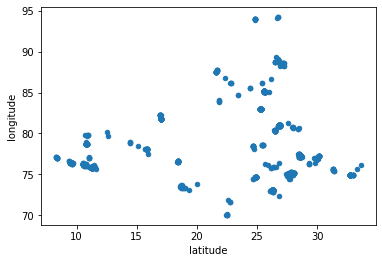

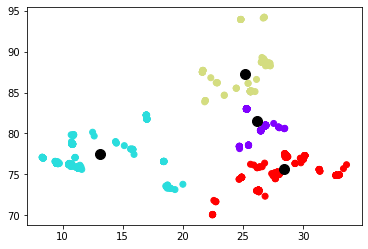

In [558]:
# use KNN to cluster longtitude and latitude: by looking at the scatter plot, we think 4 clusters would be a good threshold  
data0.plot.scatter(x='latitude', y='longitude')

# K-means clustering
X = data0[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X) 
print(y_kmeans) 
centroids = kmeans.cluster_centers_
print(centroids)
plt.figure(figsize=(6,4))
plt.scatter(X['latitude'], X['longitude'], c=y_kmeans, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], c='black', s=100)
plt.show()

# add labels back the data
data0['zones'] = y_kmeans

### Finalize selected features

In [559]:
# select relevant features 
dfa = data1[['description', 'city', 'image_count', 'room_price', 'adult_occupancy', 'child_occupancy']]
dfb = data0[['property_id', 'num_amenities', 'zones', 'descr_len','deluxe','num_simhotel', 'wifi','ac','breakfast', 'service_value']]
dfc = infodf[['acceptance_rate', 'response_label']]
property_type.columns = ['Apartment', 'Homestay', 'Hotel','House','Lodge', 'Resort', 'Spa', 'Villa' ]
clean_data = pd.concat([dfa,dfb,dfc, property_type], axis=1)


# Data cleaning

In [2]:
clean_data = pd.read_csv('stayzillaCleanFeatures.csv')
clean_data.head()
#clean_data.to_csv('stayzillaCleanFeatures.csv')

,Unnamed: 0,description,city,image_count,room_price,adult_occupancy,child_occupancy,property_id,num_amenities,zones,...,acceptance_rate,response_label,Apartment,Homestay,Hotel,House,Lodge,Resort,Spa,Villa
0,0,Sangsey Valley Resort is Located at the wonder...,Kalimpong,3.0,3167.0,3.0,2.0,67368.0,1.0,2.0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,What should you know? Enjoy unmatched service ...,Kanpur,0.0,815.0,2.0,2.0,28733.0,2.0,0.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,"What should you know? A budget hotel, this acc...",Jodhpur,18.0,1624.0,2.0,2.0,53742.0,4.0,3.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,What should you know? The Riverwood Forest Ret...,Jalpaiguri,9.0,3509.0,1.0,2.0,15468.0,7.0,2.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,What should you know? Located at a walking dis...,Kanpur,5.0,5802.0,2.0,2.0,47032.0,2.0,0.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1203 non-null   int64  
 1   description      919 non-null    object 
 2   city             1203 non-null   object 
 3   image_count      981 non-null    float64
 4   room_price       1139 non-null   float64
 5   adult_occupancy  1139 non-null   float64
 6   child_occupancy  1139 non-null   float64
 7   property_id      1139 non-null   float64
 8   num_amenities    1139 non-null   float64
 9   zones            1139 non-null   float64
 10  descr_len        1139 non-null   float64
 11  deluxe           1139 non-null   float64
 12  num_simhotel     1139 non-null   float64
 13  wifi             1139 non-null   float64
 14  ac               1139 non-null   float64
 15  breakfast        1139 non-null   float64
 16  service_value    1139 non-null   float64
 17  acceptance_rat

In [4]:
# check missing values
clean_data.isnull().sum()

# remove missing values in target variable 'room_price'
clean_data = clean_data.dropna(subset=['room_price'])

# impute missing value in image_count as 0 
clean_data.image_count = clean_data.image_count.fillna(0)

In [5]:
clean_data.isnull().sum()
print('missing value percentage:', clean_data.description.isnull().sum()/clean_data.shape[0])

missing value percentage: 0.19315188762071994


* After imputation, the only missing values are texts in 'description' column. We will leave this for now as we would not feed this feature to the regression model. 

### Process text data 
* To take description text content into account, one possible feature would be the sentiment score for each description. It may be interesting to see if sentiment of a property description has effect on the price prediction 

In [154]:
test = clean_data.dropna()
test.shape[0]/clean_data.shape[0]

0.6619718309859155

In [ ]:
textdata = clean_data[['description', 'property_id']] 
textdata['description'] = 


In [155]:
pd.set_option('max_colwidth',150)
import re, string

textdata = clean_data[['description', 'property_id']].dropna()

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower() # make all text to lowercase
    text = re.sub('\[.*?\]', '', text) # getting rid of data in brackets.  
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #get rid of punctuation marks
    text = re.sub('\w*\d\w*', '', text) #\d all digits, \w alphanumeric. Get rid of words containing numbers
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

text_clean = pd.DataFrame(textdata.description.apply(lambda x: clean_text(x)))


,description,property_id
0,Sangsey Valley Resort is Located at the wonderful location of upper delo icchey dara gaon .Delo Hill is an extended nature park with very well mai...,67368.0
1,"What should you know? Enjoy unmatched service at affordable prices at Amantran Hotel. Laundry, doctor-on-call, car parking, and a travel desk for ...",28733.0
2,"What should you know? A budget hotel, this accommodation facility is located in the heart of Jodhpur City and is easily accessible from all major ...",53742.0
3,What should you know? The Riverwood Forest Retreats is part of the Dooars in North Bengal and set amidst the mountains of the foothills of the Him...,15468.0
4,"What should you know? Located at a walking distance from the South X Mall, Hotel Vijay Inter Continental provides a wide range of services to its ...",47032.0
...,...,...
1134,What should you know? Hotel Sky High is part of a budget group of hotels that offer stylish interiors and modern facilities. Amenities include spa...,31659.0
1135,"What should you know? Saubhagya Inn is situated on Station Road. This 3 star hotel provides facilities like 24-hour front desk, travel counter, ba...",25517.0
1136,"What should you know? Located at a walkable distance from the Manak Nagar Railway station, Hotel Mohan has a total of 68 AC rooms that are categor...",789.0
1137,"What should you know? Situated 13 km away from the Chaudhary Charan Singh International Airport, Hotel Manglam offers rooms at reasonable rates. G...",13628.0


In [364]:
t=''
TextBlob(t).subjectivity

0.0

In [166]:
# get polarity score and subjectivity score using TextBlob
from textblob import TextBlob 

textdata['desc_polarity'] = text_clean.description.apply(lambda x: TextBlob(x).polarity)
textdata['desc_subjectivity'] = text_clean.description.apply(lambda x: TextBlob(x).subjectivity)

# attach the scores to original cleaned data set 
textdata

,description,property_id,desc_polarity,desc_subjectivity
0,Sangsey Valley Resort is Located at the wonderful location of upper delo icchey dara gaon .Delo Hill is an extended nature park with very well mai...,67368.0,0.377778,0.633333
1,"What should you know? Enjoy unmatched service at affordable prices at Amantran Hotel. Laundry, doctor-on-call, car parking, and a travel desk for ...",28733.0,0.240000,0.580000
2,"What should you know? A budget hotel, this accommodation facility is located in the heart of Jodhpur City and is easily accessible from all major ...",53742.0,0.221845,0.370714
3,What should you know? The Riverwood Forest Retreats is part of the Dooars in North Bengal and set amidst the mountains of the foothills of the Him...,15468.0,0.366667,0.388889
4,"What should you know? Located at a walking distance from the South X Mall, Hotel Vijay Inter Continental provides a wide range of services to its ...",47032.0,0.083333,0.508333
...,...,...,...,...
1134,What should you know? Hotel Sky High is part of a budget group of hotels that offer stylish interiors and modern facilities. Amenities include spa...,31659.0,0.187965,0.447749
1135,"What should you know? Saubhagya Inn is situated on Station Road. This 3 star hotel provides facilities like 24-hour front desk, travel counter, ba...",25517.0,0.190625,0.621875
1136,"What should you know? Located at a walkable distance from the Manak Nagar Railway station, Hotel Mohan has a total of 68 AC rooms that are categor...",789.0,0.065278,0.497222
1137,"What should you know? Situated 13 km away from the Chaudhary Charan Singh International Airport, Hotel Manglam offers rooms at reasonable rates. G...",13628.0,0.175000,0.262500


# Visual EDA

In [237]:
# price_data = clean_data
# price_data.to_csv('priceData.csv')
price_data = pd.read_csv("priceData.csv")

In [239]:
# combined = pd.read_csv('stayzilla_combined_clean.csv')
alldata = pd.concat([price_data, combined[['Newspaper', 'Parking', 'Card Payment', 'Elevator', 'Pickup & Drop',
       'Veg Only', 'Bar', 'Laundry']]], axis=1)
alldata = alldata.drop(columns='property_id')

In [233]:
from scipy.stats import iqr
1.5*iqr(price_data.room_price) + price_data.room_price.mean(),  price_data.room_price.mean() - 1.5*iqr(price_data.room_price) 

(4532.537313432836, -159.46268656716438)

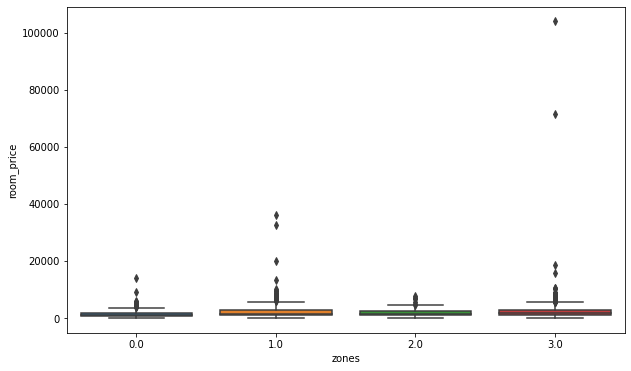

In [286]:
# check the room price outliner 
sns.boxplot(x="zones", y="room_price", data=price_data)

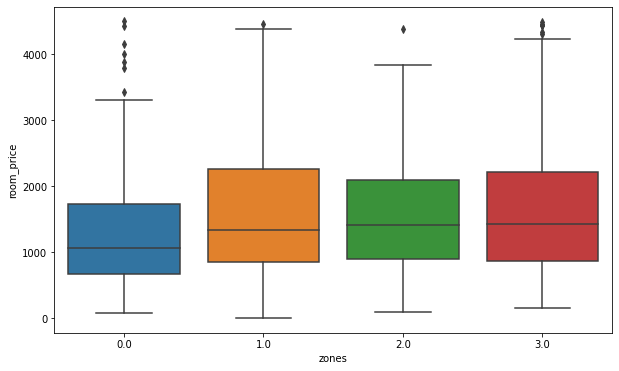

In [302]:
# remove price higher than $20000 or less than $10
# clean_data = clean_data[(clean_data.room_price < 20000) & (clean_data.room_price > 10)]
# further remove outlier: price higher than $4000 or less than $10
# train_data = price_data[(price_data.room_price < 4536) & (price_data.room_price > 0)]
train_data = price_data[(price_data.room_price < 4536) & (price_data.room_price > 0)]
train_data = train_data.drop(columns=['property_id', 'city'])

sns.boxplot(x="zones", y="room_price", data=train_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f997dcb1cd0>,
      dtype=object)

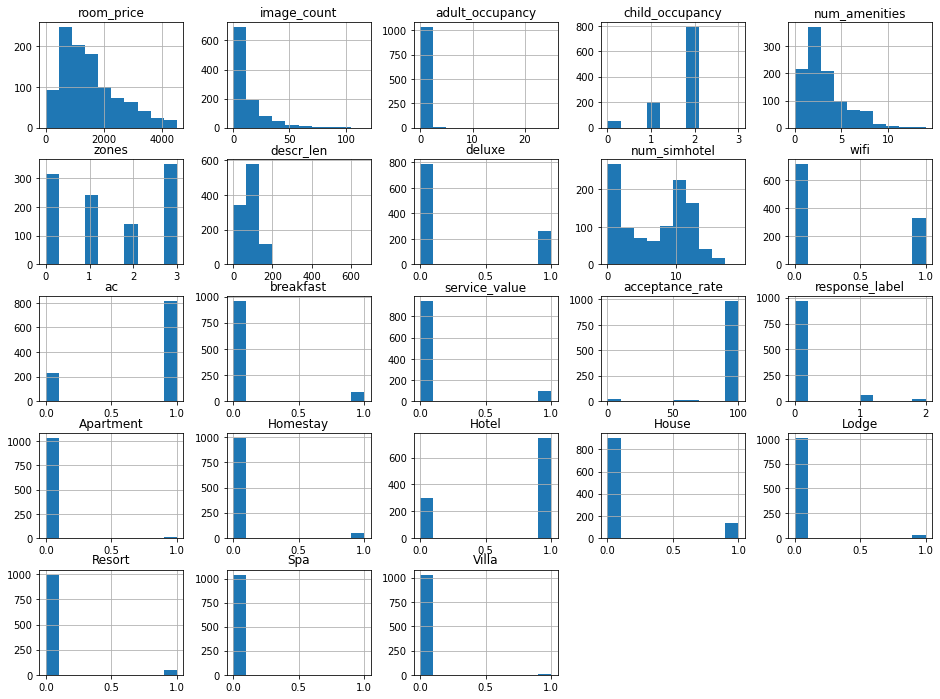

In [295]:

train_data.iloc[:,2:].hist(figsize=(16,12))

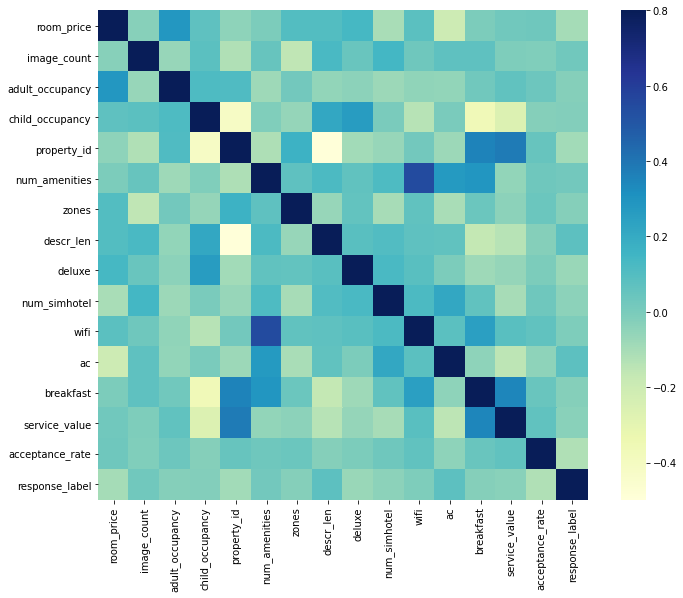

In [220]:
# check the correlation 
corrmat = train_data.iloc[:, 1:-8].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu");

In [297]:
curatedFeatures = ['room_price', 'image_count', 'adult_occupancy',
       'child_occupancy', 'num_amenities', 'zones', 'descr_len', 'deluxe',
       'num_simhotel', 'wifi', 'ac', 'Hotel',
       'House']
train_lean = train_data[curatedFeatures]

# Prediction

In [319]:
train_data.columns

Index(['Unnamed: 0', 'room_price', 'image_count', 'adult_occupancy',
       'child_occupancy', 'num_amenities', 'zones', 'descr_len', 'deluxe',
       'num_simhotel', 'wifi', 'ac', 'breakfast', 'service_value',
       'acceptance_rate', 'response_label', 'Apartment', 'Homestay', 'Hotel',
       'House', 'Lodge', 'Resort', 'Spa', 'Villa'],
      dtype='object')

## Linear regression using Gradien descent  

In [321]:
# fit all features 
X = preprocessing.scale(train_data.iloc[:,2:])
X = sm.add_constant(X)
y = train_data.iloc[:,1]
y = y.to_numpy()
y = np.expand_dims(y, axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [324]:
# define a gradient descent function 
def grad_descent(X, y, alpha, epsilon):
    iteration = [0]
    i = 0
    theta = np.ones(shape=(X.shape[1], 1))
    
    # X = X + np.array([1,0])
    
    cost = [np.transpose(X @ theta - y) @ (X @ theta - y)]
    delta = 1
    while (delta>epsilon):
        
        theta = theta - alpha*((np.transpose(X)) @ (X @ theta - y))
        cost_val = (np.transpose(X @ theta - y)) @ (X @ theta - y)
        cost.append(cost_val)
        delta = abs(cost[i+1]-cost[i])
        if ((cost[i+1]-cost[i]) > 0):
            print("The cost is increasing. Try reducing alpha.")
            break
        iteration.append(i)
        i += 1
        
    print("Completed in %d iterations." %(i))
    return theta, cost 


# get the theta

theta1, cost_hist1 = grad_descent(X = X_train, y=y_train, alpha=0.0005, epsilon = 10**-10)
#theta = result[0]
#print(theta)

The cost is increasing. Try reducing alpha.
Completed in 116 iterations.


Text(0.5, 1.0, 'Convergence of gradient descent')

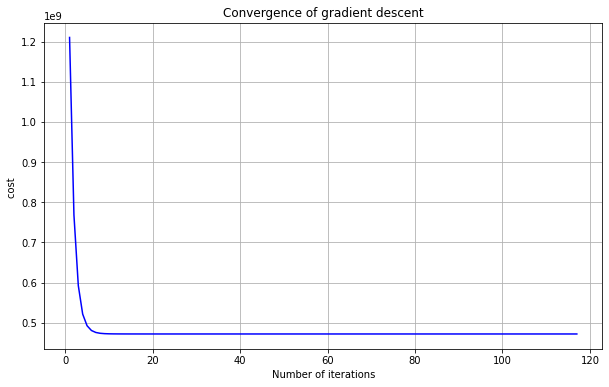

In [325]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(cost_hist1)), [cost_hist1[i][0][0] for i in range(1, len(cost_hist1))], color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost ")
plt.title("Convergence of gradient descent")

In [113]:
# alpha = 0.00101
# theta2, cost_hist2 = grad_descent(X = X_train, y=y_train, alpha=alpha, epsilon = 10**-10)

# alpha = 0.0014
# theta3, cost_hist3 = grad_descent(X = X_train, y=y_train, alpha=alpha, epsilon = 10**-10)

# alpha = 0.0016
# theta4, cost_hist4 = grad_descent(X = X_train, y=y_train, alpha=alpha, epsilon = 10**-10)

# plt.plot(range(1, len(cost_hist1)), [cost_hist1[i][0][0] for i in range(1, len(cost_hist1))], color ='blue', label = 'alpha = 0.0012')
# plt.plot(range(1, len(cost_hist2)), [cost_hist1[i][0][0] for i in range(1, len(cost_hist2))], color ='green', label = 'alpha = 0.0014')
# plt.plot(range(1, len(cost_hist3)), [cost_hist1[i][0][0] for i in range(1, len(cost_hist3))], color ='yellow', label = 'alpha = 0.0016')
# plt.plot(range(1, len(cost_hist4)), [cost_hist1[i][0][0] for i in range(1, len(cost_hist4))], color ='red', label = 'alpha = 0.004')


# plt.rcParams["figure.figsize"] = (10,6)
# plt.grid()
# plt.xlabel("Number of iterations")
# plt.ylabel("cost (J)")
# plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
# plt.legend()

The cost is increasing. Try reducing alpha.
Completed in 1 iterations.


ValueError: too many values to unpack (expected 2)

In [326]:
# test model 
y_hat = X_test.dot(theta1)

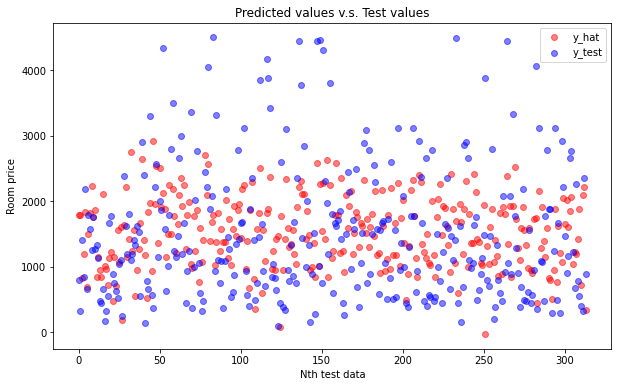

In [328]:
# plot to see the prediction results 
plt.figure()
plt.scatter(x=list(range(0, len(y_hat))),y= y_hat, color='red', alpha=0.5, label='y_hat')         
plt.scatter(x=list(range(0, len(y_test))), y=y_test, color='blue', alpha=0.5, label='y_test')
plt.xlabel("Nth test data")
plt.ylabel('Room price')
plt.title("Predicted values v.s. Test values")
plt.legend()
plt.show()

In [329]:
# evaluate MSE
from sklearn.metrics import mean_squared_error 
y_true = y_test # Y_true = Y (original values) 
y_pred = y_hat # Y_pred = Y' 
# Calculation of Mean Squared Error (MSE) 
GD_testMSE = mean_squared_error(y_true,y_pred) 

y_hat_train = X_train.dot(theta1)
y_true = y_train # Y_true = Y (original values) 
y_pred = y_hat_train # Y_pred = Y' 
# Calculation of Mean Squared Error (MSE) 
GD_trainMSE = mean_squared_error(y_true,y_pred) 
GD_testMSE

754067.4347897796

In [330]:
from sklearn.metrics import r2_score
gd_r2 = r2_score(y_true, y_pred)
gd_r2

0.2790116534538023

## Linear regression 

In [235]:
train_data.iloc[:,2:]

,room_price,image_count,adult_occupancy,child_occupancy,property_id,num_amenities,zones,descr_len,deluxe,num_simhotel,...,acceptance_rate,response_label,Apartment,Homestay,Hotel,House,Lodge,Resort,Spa,Villa
0,3167.0,3.0,3.0,2.0,67368.0,1.0,2.0,125.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,815.0,0.0,2.0,2.0,28733.0,2.0,0.0,103.0,0.0,6.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1624.0,18.0,2.0,2.0,53742.0,4.0,3.0,106.0,1.0,14.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3509.0,9.0,1.0,2.0,15468.0,7.0,2.0,126.0,0.0,0.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1400.0,60.0,2.0,2.0,61528.0,5.0,3.0,103.0,1.0,12.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1736.0,5.0,1.0,2.0,31659.0,4.0,0.0,98.0,0.0,10.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1135,2595.0,15.0,1.0,2.0,25517.0,1.0,0.0,147.0,0.0,14.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1136,2267.0,13.0,1.0,2.0,789.0,1.0,0.0,119.0,1.0,12.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1137,2446.0,16.0,1.0,2.0,13628.0,1.0,0.0,98.0,0.0,3.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [304]:
# fit all features 
X = train_data.iloc[:,2:]
X = sm.add_constant(X)
y = train_data.iloc[:,1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

lr_model = sm.OLS(y_train, X_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             room_price   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     14.33
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           6.48e-42
Time:                        16:07:22   Log-Likelihood:                -5943.2
No. Observations:                 730   AIC:                         1.193e+04
Df Residuals:                     708   BIC:                         1.203e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             723.3803    220.393      3.282      0.001     290.678    1156.082
image_count         2.9793      2.074      1.437      0.151      -1.092       7.051
adult_occupancy    30.5834     25.495      1.200      0.231     -19.472      80.639
child_occupancy    85.4633     68.061      1.256      0.210     -48.163     219.090
num_amenities      -7.6096     18.899     -0.403      0.687     -44.715      29.496
zones              49.0873     26.920      1.823      0.069      -3.765     101.939
descr_len           2.5571      0.580      4.412      0.000       1.419       3.695
deluxe            574.9003     78.424      7.331      0.000     420.929     728.871
num_simhotel        0.8172      6.771      0.121      0.904     -12.477      14.111
wifi              435.5348     82.887      5.255      0.000     272.800     598.269
ac               -355.6837     82.519     -4.310      0.000    -517.694    -193.673
breakfast         239.8937    148.090      1.620      0.106     -50.855     530.643
service_value     110.9376    132.519      0.837      0.403    -149.240     371.116
acceptance_rate     2.5301      1.836      1.378      0.169      -1.075       6.135
response_label   -294.5186     96.513     -3.052      0.002    -484.004    -105.033
Apartment        1040.9697    306.230      3.399      0.001     439.742    1642.197
Homestay         -360.4208    166.654     -2.163      0.031    -687.615     -33.226
Hotel             158.6910    101.863      1.558      0.120     -41.300     358.682
House            -418.2994    121.557     -3.441      0.001    -656.954    -179.645
Lodge            -505.7399    180.797     -2.797      0.005    -860.703    -150.777
Resort            526.7810    178.871      2.945      0.003     175.600     877.962
Spa                -5.6304    538.624     -0.010      0.992   -1063.121    1051.860
Villa             287.0292    257.065      1.117      0.265    -217.671     791.730
==============================================================================
Omnibus:                       70.228   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.728
Skew:                           0.805   Prob(JB):                     5.41e-20
Kurtosis:                       3.571   Cond. No.                     1.01e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.90394
Feature: 2, Score: 660.53992
Feature: 3, Score: -1097.29625
Feature: 4, Score: 349.43316
Feature: 5, Score: -29.93573
Feature: 6, Score: 5.18812
Feature: 7, Score: 1004.57969
Feature: 8, Score: -38.22263
Feature: 9, Score: 829.39780
Feature: 10, Score: -809.53771
Feature: 11, Score: -2433.24395
Feature: 12, Score: 565.62207
Feature: 13, Score: 5.98908
Feature: 14, Score: -572.89051
Feature: 15, Score: 6883.16604
Feature: 16, Score: -1491.63856
Feature: 17, Score: -651.77349
Feature: 18, Score: -1720.01034
Feature: 19, Score: -2262.97539
Feature: 20, Score: 1106.21015
Feature: 21, Score: -1009.87539
Feature: 22, Score: -853.10302
Feature: 23, Score: 36.99746
Feature: 24, Score: -790.30754
Feature: 25, Score: -824.17189
Feature: 26, Score: -722.34115
Feature: 27, Score: -843.01738
Feature: 28, Score: -909.99605
Feature: 29, Score: -176.73111
Feature: 30, Score: 0.00000


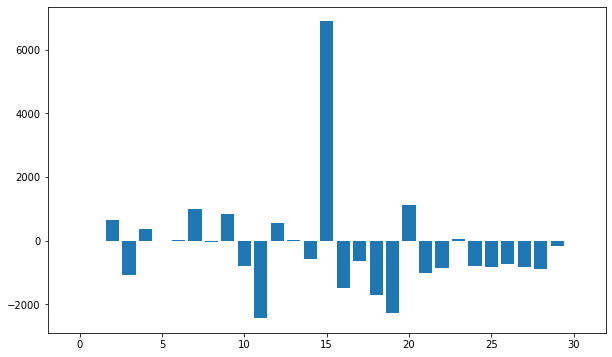

In [267]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [283]:
X.iloc[:,np.r_[11, 15, 16, 18, 19]]

,breakfast,Apartment,Homestay,House,Lodge
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1134,0.0,0.0,0.0,0.0,0.0
1135,0.0,0.0,0.0,0.0,0.0
1136,0.0,0.0,0.0,0.0,0.0
1137,0.0,0.0,0.0,0.0,0.0


In [165]:
# # after checking, remove some non-essential features 
# X = train_data.iloc[:,np.r_[2:16,18:20]]
# X = sm.add_constant(X)
# y = train_data.iloc[:,1]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# lr_model = sm.OLS(y_train, X_train).fit()
# lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             room_price   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     13.42
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.28e-31
Time:                        12:26:42   Log-Likelihood:                -5752.4
No. Observations:                 714   AIC:                         1.154e+04
Df Residuals:                     697   BIC:                         1.162e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             997.7271    219.328      4.549      0.000     567.104    1428.350
image_count        -0.7798      2.072     -0.376      0.707      -4.848       3.288
adult_occupancy    14.0550     22.675      0.620      0.536     -30.464      58.574
child_occupancy    97.7075     61.899      1.578      0.115     -23.824     219.239
num_amenities     -10.2008     18.128     -0.563      0.574     -45.793      25.392
zones              57.5293     24.203      2.377      0.018      10.009     105.049
descr_len           2.6413      0.534      4.943      0.000       1.592       3.690
deluxe            485.9947     72.214      6.730      0.000     344.212     627.778
num_simhotel        9.7775      6.211      1.574      0.116      -2.417      21.972
wifi              281.0904     79.140      3.552      0.000     125.710     436.471
ac               -295.9302     76.455     -3.871      0.000    -446.039    -145.821
breakfast         216.7176    139.612      1.552      0.121     -57.393     490.829
service_value      45.4484    111.965      0.406      0.685    -174.382     265.278
acceptance_rate     0.0663      1.672      0.040      0.968      -3.216       3.348
response_label   -302.5562     90.932     -3.327      0.001    -481.089    -124.023
Hotel              37.0546     91.584      0.405      0.686    -142.759     216.868
House            -462.1834    114.228     -4.046      0.000    -686.455    -237.911
==============================================================================
Omnibus:                       88.759   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.724
Skew:                           0.937   Prob(JB):                     6.10e-27
Kurtosis:                       3.741   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We first fit all relevant features to the linear regression model using statsmodel. The adjusted R2 only achieves 0.272. We then removed some non-essential features (eg. 'Spa', 'Villa', very few rows have 1 values), the R2 does not increase (0.218). 
* We then perform a Stepwise selection in R and it returns a model with 13 features, but the adjusted R2 is only 0.1746, less than models with more features. 
* For linear regression model, we will stick with all features.

In [171]:
# compute test MSE 
y_true = y_test # Y_true = Y (original values) 
y_pred = lr_model.predict(X_test) # Y_pred = Y' 
lr_testMSE = mean_squared_error(y_true,y_pred) 

# training mse
y_true = y_train  
y_pred = lr_model.predict(X_train) 
lr_trainMSE = mean_squared_error(y_true,y_pred) 
print(lr_testMSE, lr_trainMSE)

682249.1177142463 538005.910722023


* ### Try predict in per zone

In [184]:
zone0 = train_data[train_data.zones==0].drop(columns='zones')
zone1 = train_data[train_data.zones==1].drop(columns='zones')
zone2 = train_data[train_data.zones==2].drop(columns='zones')
zone3 = train_data[train_data.zones==3].drop(columns='zones')

In [187]:
# X = zone3.iloc[:,2:]
# X = sm.add_constant(X)
# y = zone3.iloc[:,1]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# lr_model = sm.OLS(y_train, X_train).fit()
# lr_model.summary()

/Users/yajiezhu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             room_price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     7.053
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.86e-14
Time:                        12:58:01   Log-Likelihood:                -1864.6
No. Observations:                 234   AIC:                             3769.
Df Residuals:                     214   BIC:                             3838.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             940.6670    403.693      2.330      0.021     144.943    1736.391
image_count         3.6919      3.939      0.937      0.350      -4.072      11.455
adult_occupancy   -56.0928     78.646     -0.713      0.476    -211.113      98.927
child_occupancy    -1.3125     95.173     -0.014      0.989    -188.909     186.284
num_amenities      20.3071     26.571      0.764      0.446     -32.067      72.681
descr_len           0.4495      0.978      0.459      0.646      -1.479       2.378
deluxe            510.3983    119.998      4.253      0.000     273.869     746.928
num_simhotel       29.4450     10.638      2.768      0.006       8.477      50.413
wifi              524.8552    124.966      4.200      0.000     278.532     771.178
ac               -334.2704    121.654     -2.748      0.007    -574.065     -94.476
breakfast          60.3859    224.546      0.269      0.788    -382.220     502.992
service_value     343.6611    228.919      1.501      0.135    -107.565     794.887
acceptance_rate     0.3902      3.952      0.099      0.921      -7.400       8.180
response_label   -482.8702    224.971     -2.146      0.033    -926.314     -39.427
Apartment        1090.4852    291.373      3.743      0.000     516.157    1664.814
Homestay         -409.9101    332.634     -1.232      0.219   -1065.569     245.748
Hotel             211.8204    148.366      1.428      0.155     -80.626     504.267
House             -65.5355    184.871     -0.354      0.723    -429.937     298.865
Lodge            -485.2499    386.194     -1.256      0.210   -1246.481     275.981
Resort            702.0840    306.774      2.289      0.023      97.398    1306.770
Spa                      0          0        nan        nan           0           0
Villa            -103.0270    500.691     -0.206      0.837   -1089.944     883.890
==============================================================================
Omnibus:                       11.194   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.787
Skew:                           0.549   Prob(JB):                      0.00276
Kurtosis:                       3.041   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* The prediction results per zone do not significantly. This indicates that the low performance for linear regression prediction may be because the lack of substantial features related to room price such as the room area, and the decoration of rooms. 

In [309]:
from sklearn.ensemble import RandomForestRegressor
X = preprocessing.scale(train_data.iloc[:,2:])
y = train_data.iloc[:,1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

rr = RandomForestRegressor(n_estimators = 1000)
rr.fit(X_train, y_train.values.ravel())
 


RandomForestRegressor(n_estimators=1000)

In [314]:

y_true = y_test # Y_true = Y (original values) 
y_pred = predictions = rr.predict(X_test) # Y_pred = Y' 
rr_testMSE = mean_squared_error(y_true,y_pred) 
rr_testMSE

691428.0745319917

In [316]:
# calculate r2
from sklearn.metrics import r2_score
rr_r2 = r2_score(y_true, y_pred)
rr_r2

0.23662194564090278